In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

start_time = time.time()

df = pd.read_csv('C:/Users/DELL/Desktop/aiproject/Cleaned_WQI_Dataset.csv') 
# Updated iqr_multipliers (without "Total Hardness (as CaCO3)")
iqr_multipliers = {
    0: {'Alkalinity-total (as CaCO3)': 0.2, 'Ammonia-Total (as N)': 1.0, 'BOD - 5 days (Total)': 2.0,
        'Conductivity @25°C': 3.0, 'Total Hardness (as CaCO3)' : 0.5,
        'pH': 0.5},
    1: {'Alkalinity-total (as CaCO3)': 0.3, 'Ammonia-Total (as N)': 6.0, 'BOD - 5 days (Total)': 2.5,
        'Conductivity @25°C': 1.0,'pH': 1.0},
    2: {'Alkalinity-total (as CaCO3)': 0.3, 'Ammonia-Total (as N)': 6.0, 'BOD - 5 days (Total)': 3.0,
        'Conductivity @25°C': 3.0,'pH': 0.5},
    3: {'Alkalinity-total (as CaCO3)': 0.3, 'Ammonia-Total (as N)': 6.0, 'BOD - 5 days (Total)': 3.5,
        'Conductivity @25°C': 2.5,'pH': 1.0},
    4: {'Alkalinity-total (as CaCO3)': 0.3, 'Ammonia-Total (as N)': 6.0, 'BOD - 5 days (Total)': 4.0,
        'Conductivity @25°C': 3.0,'pH': 1.0},
    5: {'Alkalinity-total (as CaCO3)': 8, 'Ammonia-Total (as N)': 8.0, 'BOD - 5 days (Total)': 8,
        'Conductivity @25°C': 3.0,'pH': 5.0}
}

# Include 'Total Hardness (as CaCO3)' in analysis and plots, but not in filtering
all_features = ['Alkalinity-total (as CaCO3)', 'Ammonia-Total (as N)', 'BOD - 5 days (Total)', 
                'Conductivity @25°C','pH', 'Total Hardness (as CaCO3)']

filtered_df = pd.DataFrame()
outlier_counts = {}

for label in df['WAWQI_Label'].unique():
    group = df[df['WAWQI_Label'] == label].copy()
    before_count = group.shape[0]

    for feature in iqr_multipliers[label].keys():
        Q1 = group[feature].quantile(0.25)
        Q3 = group[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - iqr_multipliers[label][feature] * IQR
        upper = Q3 + iqr_multipliers[label][feature] * IQR

        outliers = group[(group[feature] < lower) | (group[feature] > upper)]
        outlier_counts[(label, feature)] = outliers.shape[0]

        group = group[(group[feature] >= lower) & (group[feature] <= upper)]

    after_count = group.shape[0]
    print(f"Label {label} — Removed {before_count - after_count} total rows")
    filtered_df = pd.concat([filtered_df, group], ignore_index=True)

# Value counts per feature per label
print("\n🔢 Value Counts per Feature per WAWQI Label (Original vs Filtered):")
for feature in all_features:
    print(f"\n=== Feature: {feature} ===")

    print("\nOriginal Data:")
    print(df.groupby('WAWQI_Label')[feature].count())

    print("\nFiltered Data:")
    print(filtered_df.groupby('WAWQI_Label')[feature].count())

# Outlier Report
outlier_report = pd.DataFrame([
    {'Label': k[0], 'Feature': k[1], 'Outliers Removed': v}
    for k, v in outlier_counts.items()
])
print("\n📊 Outliers removed per label & feature:")
print(outlier_report)

# Dataset Shapes
print("\n🧾 Dataset Shapes:")
print("Original:", df.shape)
print("Filtered:", filtered_df.shape)

# WAWQI Label Counts
print("\n🔢 WAWQI Label Counts:")
print("Original:")
print(df['WAWQI_Label'].value_counts().sort_index())
print("\nFiltered:")
print(filtered_df['WAWQI_Label'].value_counts().sort_index())

# Save to CSV
filtered_df.to_csv("newCleared_WQI_Results_on_Dataset.csv", index=False)

for feature in all_features:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

    # --- Left Plot: Original Data ---
    sns.boxplot(
        x='WAWQI_Label',
        y=feature,
        data=df,
        ax=axes[0],
        palette='pastel',
        showfliers=True
    )
    sns.stripplot(
        x='WAWQI_Label',
        y=feature,
        data=df,
        color='black',
        size=4,
        alpha=0.5,
        ax=axes[0]
    )
    axes[0].set_title(f"Original Data — {feature}", fontsize=13)
    axes[0].set_xlabel("WAWQI Label")
    axes[0].set_ylabel(feature)

    # --- Right Plot: Filtered (Cleaned) Data ---
    sns.boxplot(
        x='WAWQI_Label',
        y=feature,
        data=filtered_df,
        ax=axes[1],
        palette='Set2',
        showfliers=True
    )
    sns.stripplot(
        x='WAWQI_Label',
        y=feature,
        data=filtered_df,
        color='black',
        size=4,
        alpha=0.6,
        ax=axes[1]
    )
    axes[1].set_title(f"Filtered Data — {feature}", fontsize=13)
    axes[1].set_xlabel("WAWQI Label")
    axes[1].set_ylabel("")  # No duplicate y-label

    plt.tight_layout()
    plt.show()







print("\n⏱️ Execution Time: {:.2f} seconds".format(time.time() - start_time))


Label 2 — Removed 11368 total rows
Label 0 — Removed 2088 total rows
Label 5 — Removed 363 total rows
Label 3 — Removed 579 total rows
Label 1 — Removed 1878 total rows
Label 4 — Removed 206 total rows

🔢 Value Counts per Feature per WAWQI Label (Original vs Filtered):

=== Feature: Alkalinity-total (as CaCO3) ===

Original Data:
WAWQI_Label
0     4166
1     3035
2    17947
3     1315
4      456
5     2240
Name: Alkalinity-total (as CaCO3), dtype: int64

Filtered Data:
WAWQI_Label
0    2078
1    1157
2    6579
3     736
4     250
5    1877
Name: Alkalinity-total (as CaCO3), dtype: int64

=== Feature: Ammonia-Total (as N) ===

Original Data:
WAWQI_Label
0     4166
1     3035
2    17947
3     1315
4      456
5     2240
Name: Ammonia-Total (as N), dtype: int64

Filtered Data:
WAWQI_Label
0    2078
1    1157
2    6579
3     736
4     250
5    1877
Name: Ammonia-Total (as N), dtype: int64

=== Feature: BOD - 5 days (Total) ===

Original Data:
WAWQI_Label
0     4166
1     3035
2    17947
3  

PermissionError: [Errno 13] Permission denied: 'newCleared_WQI_Results_on_Dataset.csv'

In [4]:
df = pd.read_csv('C:/Users/DELL/Desktop/aiproject/newCleared_WQI_Results_on_Dataset.csv') 
df.describe()

,Alkalinity-total (as CaCO3),Ammonia-Total (as N),BOD - 5 days (Total),Conductivity @25°C,pH,Total Hardness (as CaCO3),WAWQI_Label
count,12677.000000,12677.000000,12677.000000,12677.000000,12677.000000,12677.000000,12677.000000
mean,130.881385,0.040200,1.198523,346.891601,7.662109,149.463937,2.122584
std,81.283721,0.043586,0.122543,152.058384,0.462450,86.919069,1.483780
min,1.000000,0.000000,0.400000,33.000000,5.400000,0.000000,0.000000
25%,58.000000,0.033000,1.200000,234.000000,7.400000,71.100000,1.000000
50%,127.000000,0.033000,1.200000,356.000000,7.800000,152.000000,2.000000
75%,203.000000,0.033000,1.200000,470.000000,8.000000,224.000000,2.000000
max,432.000000,0.960000,2.100000,866.000000,9.100000,484.000000,5.000000


In [26]:
import pandas as pd

# Load the dataset
df = pd.read_csv("newCleared_WQI_Results_on_Dataset.csv")

# Replace WAWQI_Label: convert 2, 3, 4 to 1
df['WAWQI_Label'] = df['WAWQI_Label'].replace({2: 1, 3: 1, 4: 1})

# Replace WAWQI category names: Good, Moderate, Poor → Fair
df['WAWQI'] = df['WAWQI'].replace({'Good': 'Fair', 'Moderate': 'Fair', 'Poor': 'Fair'})

# Save the updated file
df.to_csv("updated_WQI_Results.csv", index=False)

print("✅ WAWQI and WAWQI_Label values updated and saved to 'updated_WQI_Results.csv'")


✅ WAWQI and WAWQI_Label values updated and saved to 'updated_WQI_Results.csv'


In [28]:
df.head()

,Alkalinity-total (as CaCO3),Ammonia-Total (as N),BOD - 5 days (Total),Conductivity @25°C,pH,Total Hardness (as CaCO3),WAWQI,WAWQI_Label
0,106.0,0.033,1.2,374.0,7.9,106.0,Fair,1
1,214.0,0.033,1.2,572.0,8.1,150.0,Fair,1
2,113.0,0.033,1.2,380.0,8.0,105.0,Fair,1
3,240.0,0.033,1.2,590.0,7.5,253.0,Fair,1
4,220.0,0.033,1.2,593.0,8.1,146.0,Fair,1


C:\Users\DELL\AppData\Local\Temp\ipykernel_5616\1159581546.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


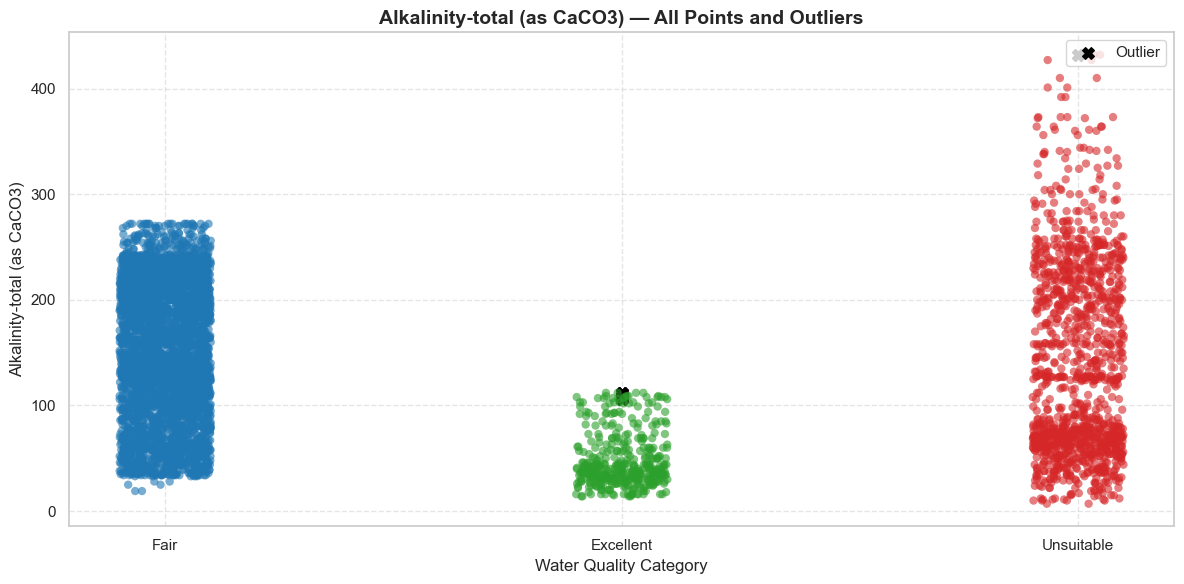

C:\Users\DELL\AppData\Local\Temp\ipykernel_5616\1159581546.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


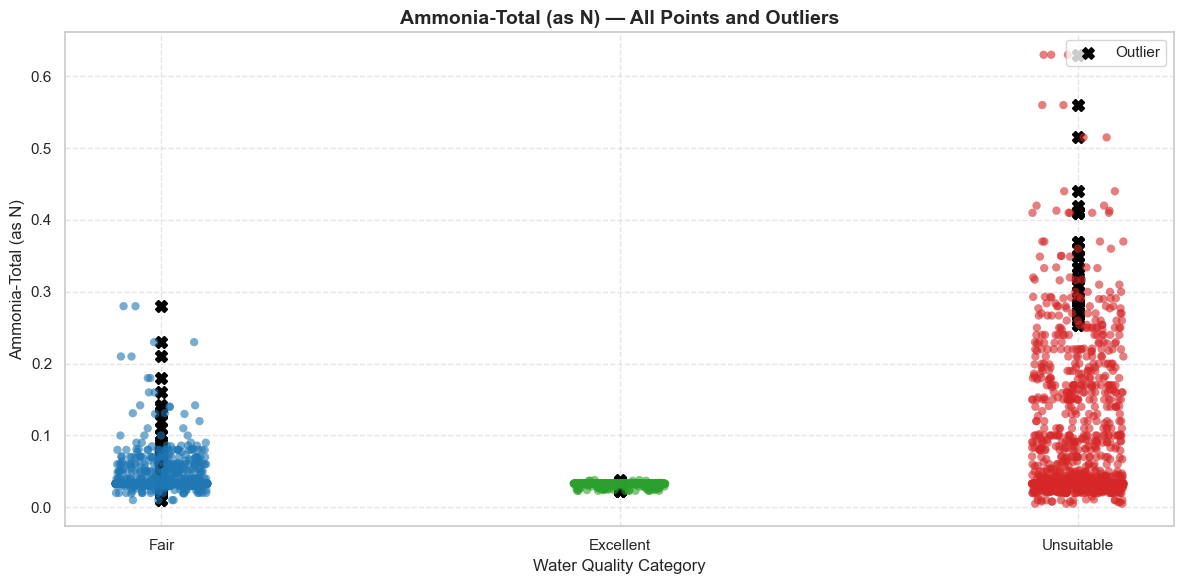

C:\Users\DELL\AppData\Local\Temp\ipykernel_5616\1159581546.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


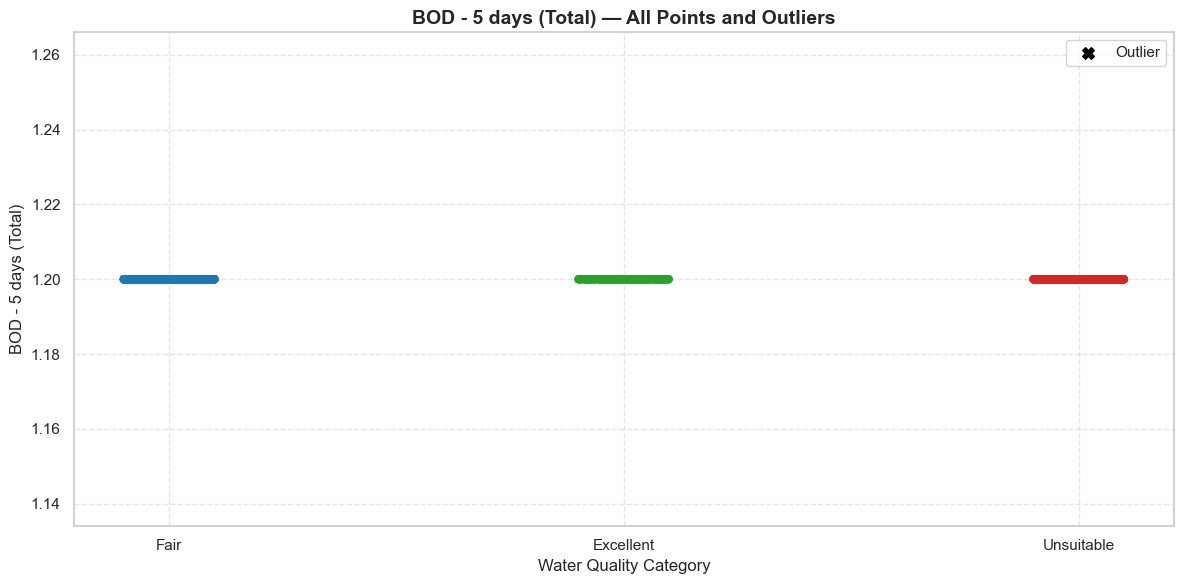

C:\Users\DELL\AppData\Local\Temp\ipykernel_5616\1159581546.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


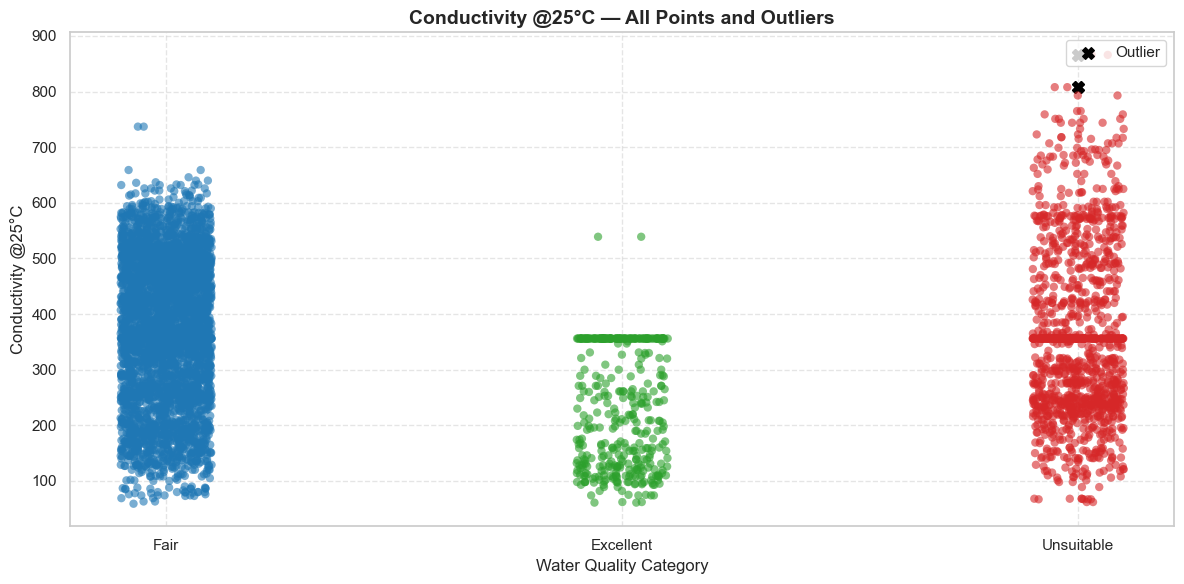

C:\Users\DELL\AppData\Local\Temp\ipykernel_5616\1159581546.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


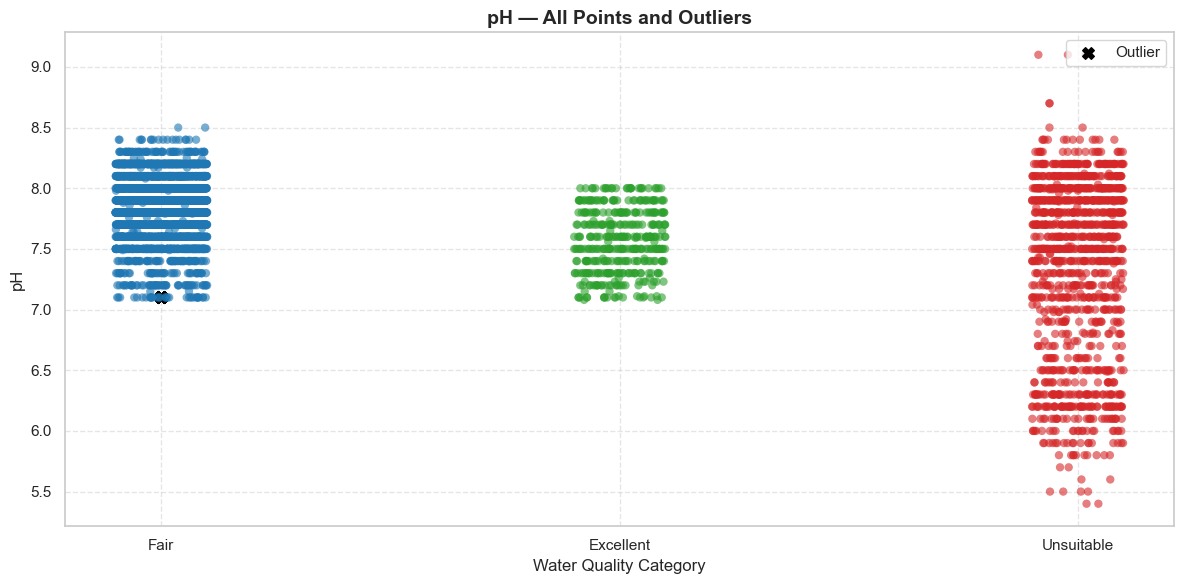

C:\Users\DELL\AppData\Local\Temp\ipykernel_5616\1159581546.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


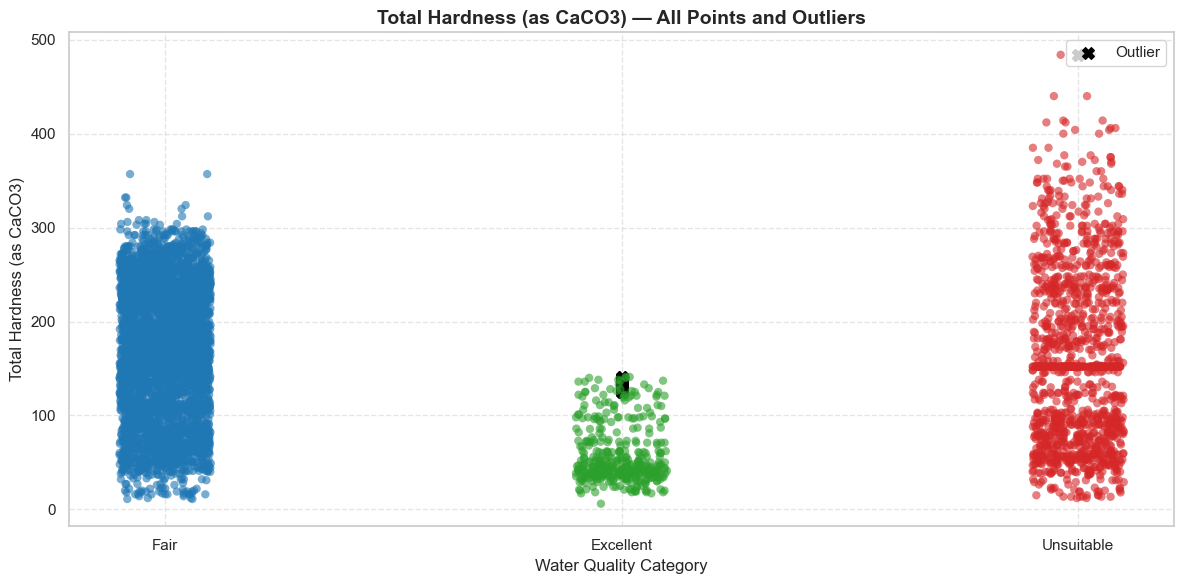

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("updated_WQI_Results.csv")

# Map labels to categories for readability
label_mapping = {0: 'Excellent', 1: 'Fair', 5: 'Unsuitable'}
df['WAWQI_Label'] = df['WAWQI_Label'].map(label_mapping)

# Features to plot
features = [
    'Alkalinity-total (as CaCO3)',
    'Ammonia-Total (as N)',
    'BOD - 5 days (Total)',
    'Conductivity @25°C',
    'pH',
    'Total Hardness (as CaCO3)'
]

# Set theme
sns.set(style="whitegrid")

# Color palette
palette = {
    'Excellent': '#2ca02c',
    'Fair': '#1f77b4',
    'Unsuitable': '#d62728'
}

# Plot each feature
for feature in features:
    plt.figure(figsize=(12, 6))

    # Plot all data points as dots
    sns.stripplot(
        x='WAWQI_Label',
        y=feature,
        data=df,
        palette=palette,
        size=6,
        jitter=True,
        alpha=0.6
    )

    # Calculate IQR and overlay outliers
    for label in df['WAWQI_Label'].unique():
        group = df[df['WAWQI_Label'] == label]
        Q1 = group[feature].quantile(0.25)
        Q3 = group[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        # Outliers
        outliers = group[(group[feature] < lower) | (group[feature] > upper)]

        # Plot outliers as red 'X'
        plt.scatter(
            x=[label] * len(outliers),
            y=outliers[feature],
            color='black',
            marker='X',
            s=70,
            label='Outlier' if label == df['WAWQI_Label'].unique()[0] else ""
        )

    plt.title(f'{feature} — All Points and Outliers', fontsize=14, fontweight='bold')
    plt.xlabel('Water Quality Category', fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()


In [34]:
df.describe()

,Alkalinity-total (as CaCO3),Ammonia-Total (as N),BOD - 5 days (Total),Conductivity @25°C,pH,Total Hardness (as CaCO3)
count,5683.000000,5683.000000,5.683000e+03,5683.000000,5683.000000,5683.000000
mean,141.388277,0.046448,1.200000e+00,359.559884,7.738467,158.871160
std,72.571706,0.050765,1.174719e-13,137.019292,0.461304,78.408201
min,7.000000,0.005000,1.200000e+00,59.000000,5.400000,6.000000
25%,76.000000,0.033000,1.200000e+00,252.500000,7.600000,91.000000
50%,135.000000,0.033000,1.200000e+00,356.000000,7.800000,156.000000
75%,204.000000,0.033000,1.200000e+00,468.000000,8.000000,224.000000
max,432.000000,0.630000,1.200000e+00,866.000000,9.100000,484.000000


In [3]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('updated_WQI_Results.csv')  # replace 'your_file.csv' with your actual filename
print(df.columns.tolist())

['Alkalinity-total (as CaCO3)', 'Ammonia-Total (as N)', 'BOD - 5 days (Total)', 'Conductivity @25°C', 'pH', 'Total Hardness (as CaCO3)', 'WAWQI', 'WAWQI_Label']


In [6]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('updated_WQI_Results.csv')  # replace 'your_file.csv' with your actual filename

# Define acceptable ranges
conditions = (
    (df['Alkalinity-total (as CaCO3)'] >= 0) & (df['Alkalinity-total (as CaCO3)'] <= 200) &
    (df['Ammonia-Total (as N)'] >= 0) & (df['Ammonia-Total (as N)'] <= 0.05) &
    (df['Conductivity @25°C'] >= 100) & (df['Conductivity @25°C'] <= 250) &
    (df['pH'] >= 7.0) & (df['pH'] <= 8.0) &
    (df['Total Hardness (as CaCO3)'] >= 0) & (df['Total Hardness (as CaCO3)'] <= 150)
)

# Filter rows where WAWQI_Label is 'Unsuitable' and all parameters are within range
filtered_df = df[(df['WAWQI_Label'] == 'Unsuitable') & conditions]

# Count the rows
count = len(filtered_df)

print(f"Number of 'Unsuitable' rows that meet all acceptable parameter ranges: {count}")


Number of 'Unsuitable' rows that meet all acceptable parameter ranges: 0
